In [ ]:
### DATA LOADING AND AUGMENTATION

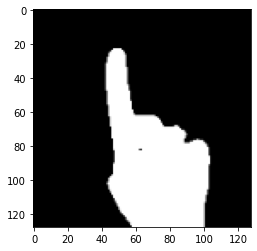

(6, 128, 128, 3)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

image = []
image.append(cv2.imread('/content/drive/My Drive/Data/hand/0_0.png'))
image.append(cv2.imread('/content/drive/My Drive/Data/hand/0_1.png'))
image.append(cv2.imread('/content/drive/My Drive/Data/hand/0_2.png'))
image.append(cv2.imread('/content/drive/My Drive/Data/hand/0_3.png'))
image.append(cv2.imread('/content/drive/My Drive/Data/hand/0_4.png'))
image.append(cv2.imread('/content/drive/My Drive/Data/hand/0_5.png'))

y_label = [0,1,2,3,4,5]
y_train = np.asarray(y_label)
image = np.asarray(image)
plt.imshow(image[1,:,:,:])
plt.show()
x_train = np.asarray(image)
x_train.shape

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.3),
])

In [ ]:
for i in range(1000):
  augmented_image = data_augmentation(image)
  x_train=np.append(x_train,augmented_image,axis=0)
  y_train=np.append(y_train,y_label,axis=0)
  

In [ ]:
x_train.shape,y_train.shape

((6006, 128, 128, 3), (6006,))

In [ ]:
x_train1 = x_train+5
x_train2 = x_train+200
x_train=np.append(x_train,x_train1,axis=0)
x_train=np.append(x_train,x_train1,axis=0)

y_train1 = y_train
y_train=np.append(y_train,y_train1,axis=0)
y_train=np.append(y_train,y_train1,axis=0)

x_train = x_train.astype('float32')
images = image.astype('float32')

x_train=x_train/255
x_train.shape,y_train.shape

((18018, 128, 128, 3), (18018,))

In [ ]:
x_test = image
y_test= np.asarray(y_label)

In [ ]:

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.5),
])


for i in range(250):
  augmented_image = data_augmentation(image)
  x_test=np.append(x_test,augmented_image,axis=0)
  y_test=np.append(y_test,y_label,axis=0)

In [ ]:
x_test = np.append(x_test, x_test+20,axis=0)
y_test =np.append(y_test,y_test,axis=0)
x_test = x_test.astype('float32')

x_test=x_test/255
x_test.shape,y_test.shape

((3012, 128, 128, 3), (3012,))

In [ ]:
### MODEL

In [ ]:
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, AveragePooling2D


model = Sequential()


model.add(Conv2D(32, kernel_size=(3,3),strides=(1,1), input_shape=x_train.shape[1:],padding="same",activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding="valid"))


model.add(Conv2D(8, kernel_size=(1,1),strides=(1,1),padding="same",activation=tf.nn.relu))


model.add(Conv2D(16, kernel_size=(3,3),strides=(1,1),padding="same",activation=tf.nn.relu))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))


model.add(Conv2D(8, kernel_size=(1,1),strides=(1,1),padding="same",activation=tf.nn.relu))
model.add(AveragePooling2D(pool_size=(2, 2),strides=(2,2),padding="valid"))

# Flatten_Dense_Network
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2)) 
model.add(Dense(32, activation=tf.nn.relu))

#Softmax Layer with 6 neurons in output layer
model.add(Dense(6,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train,batch_size=64, epochs=5)

Epoch 1/5
282/282 [==============================] - 5s 19ms/step - loss: 0.3516 - accuracy: 0.8771
Epoch 2/5
282/282 [==============================] - 5s 19ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 3/5
282/282 [==============================] - 5s 19ms/step - loss: 0.0056 - accuracy: 0.9985
Epoch 4/5
282/282 [==============================] - 5s 19ms/step - loss: 9.5416e-04 - accuracy: 0.9998
Epoch 5/5
282/282 [==============================] - 5s 19ms/step - loss: 0.0014 - accuracy: 0.9997


In [ ]:
Accuracy_test = model.evaluate(x_test, y_test)
Accuracy_train = model.evaluate(x_train,y_train)


564/564 [==============================] - 3s 5ms/step - loss: 0.0048 - accuracy: 0.9991


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 8)         264       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
average_pooling2d_2 (Average (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 8)         136       
_________________________________________________________________
average_pooling2d_3 (Average (None, 16, 16, 8)        